In [2]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

OL_up   = pd.read_csv('ChEA_OL_up.csv')
OL_down = pd.read_csv('ChEA_OL_down.csv')

data = pd.read_csv("DEG_Oligodendrocyte.csv")
data['Gene'] = data['Gene'].str.upper()

sigdata = data.loc[data["pvalue"]<0.05]
sigdata.reset_index(drop=True, inplace=True)

signames = sigdata['Gene'].tolist()

## NRF targets (positive regulation)

In [3]:
NRF = OL_up[(OL_up['Term'].str.contains('NFE2L|NRF')) & (OL_up['Term'].str.contains('Mouse'))]
NRF = NRF[['Term','Overlap','Adjusted.P.value','Genes']]

NRF = NRF['Genes'].tolist()
for i in range(len(NRF)):
    NRF[i] = NRF[i].split(';')
NRF_common = list(set.intersection(*map(set, NRF))) 
NRF_OL_up = list(set.intersection(*map(set, NRF), {*signames})) 
print(NRF_OL_up)

NRF_data_up = sigdata[sigdata['Gene'].isin(NRF_OL_up)].sort_values(by='log2FoldChange',ascending=True)
NRF_data_up

['LBH', 'DPYD', 'PLEKHA3', 'LAMA2', 'NAPB', 'ST3GAL4', 'VPS8', 'PLA2G4A', 'MAML2', 'ALDH1A1', 'BTBD3', 'SLPI', 'GLI2', 'SLC30A4', 'SASH1', 'CTSO', 'LPP', 'DOCK5', 'NEK7', 'DDC', 'SEMA6D', 'LCP1', 'TMTC2', 'ST5', 'IRS2', 'RASGRP3', 'LAPTM4B', 'TMEM117', 'RGMA', 'TANC1', 'FMNL2', 'LIFR', 'EYA4', 'ENAH', 'B230118H07RIK', 'DAAM2']


,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
175,NAPB,42.128928,0.839559,0.425504,1.973092,0.048485,0.398171
163,SEMA6D,453.801311,0.867977,0.439779,1.973664,0.048420,0.398029
1000,LIFR,28.578973,0.966488,0.485911,1.989024,0.046699,0.393204
55,NEK7,45.075437,1.021666,0.475993,2.146387,0.031842,0.325423
76,ENAH,134.095650,1.130512,0.315280,3.585738,0.000336,0.011848
1063,LPP,40.998603,1.131451,0.432790,2.614320,0.008941,0.139281
540,RGMA,45.837128,1.134155,0.465653,2.435621,0.014866,0.193844
141,B230118H07RIK,30.836725,1.144318,0.522228,2.191222,0.028436,0.302502
581,SASH1,102.913201,1.151321,0.452299,2.545485,0.010913,0.156304
134,PLEKHA3,22.920924,1.154331,0.538518,2.143532,0.032070,0.327316


## NRF targets (negative regulation)

In [4]:
NRF = []
NRF = OL_down[(OL_down['Term'].str.contains('NFE2L|NRF')) & (OL_down['Term'].str.contains('Mouse'))]
NRF = NRF[['Term','Overlap','Adjusted.P.value','Genes']]

NRF = NRF['Genes'].tolist()
for i in range(len(NRF)):
    NRF[i] = NRF[i].split(';')
NRF_common = list(set.intersection(*map(set, NRF)))
NRF_OL_down = list(set.intersection(*map(set, NRF), {*signames}))
print(NRF_OL_down)

NRF_data_down = sigdata[sigdata['Gene'].isin(NRF_OL_down)].sort_values(by='log2FoldChange',ascending=False)

['KCNJ2', 'ERC2', 'CAMK1D', 'EFNA5', 'PRKAR2B', 'FRMD6', 'DCTD', 'HS3ST5', 'GDNF', 'ATRNL1', 'OSBPL8', 'MAN2A1', 'CDH9', 'SYNPO2', 'PLXNA2', 'SLC4A4', 'ZMAT4', 'CACNA1E', 'CAP2', 'STRN', 'INF2', 'GRM1', 'SGK1', 'MN1', 'SMAD3', 'GADD45G', 'UTRN', 'GIPC2', 'TMEM44', 'GRID1', 'FAM135B', 'SORBS2', 'TTLL11', 'FOXP1', 'ENC1', 'KCTD17', 'SH3RF2', 'CACNA2D3', 'BMP6', 'OPCML', 'KITL', 'CHST11', 'RAB3C', 'KCNAB1', 'DAB2IP', 'SAMD5', 'P4HA1', 'PCDH7', 'CDH8', 'YWHAZ', 'DIRAS2', 'KCNH3', 'TPM1', 'KCNA4', 'EFNB2', 'NETO2', 'SULF1', 'SYNE1', 'CHRM3', 'TIAM2', 'ADAM23', 'AUTS2', 'ZFAND2B', 'RALGPS2', 'CLCN1', 'DAPK1', 'FAM69A']


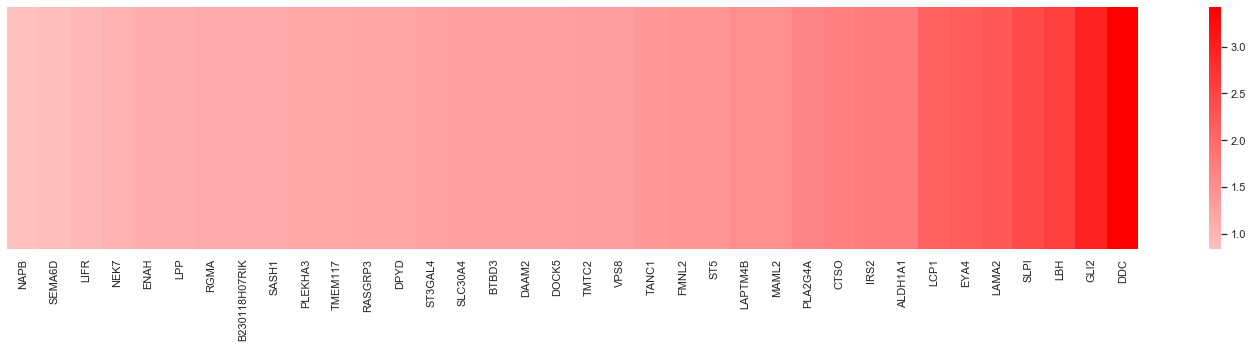

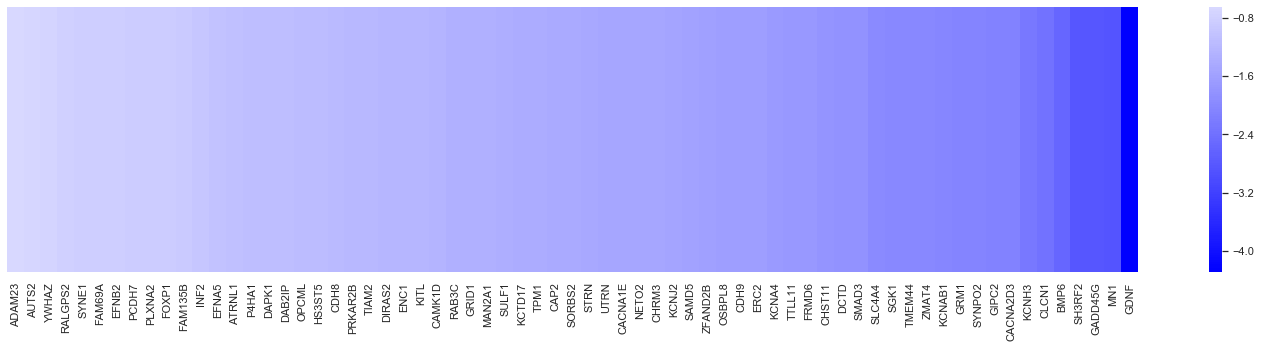

In [6]:
sns.set(rc={'figure.figsize':(20,5)})

plt.figure()
fig_up = sns.heatmap([NRF_data_up['log2FoldChange']], xticklabels=NRF_data_up['Gene'], yticklabels=False, cmap='bwr', center=0)
fig = fig_up.get_figure()
plt.tight_layout()
fig.savefig('NRF_OL_up_heatmap.png')

plt.figure()
fig_down = sns.heatmap([NRF_data_down['log2FoldChange']], xticklabels=NRF_data_down['Gene'], yticklabels=False, cmap='bwr', center=0)
fig = fig_down.get_figure()
plt.tight_layout()
fig.savefig('NRF_OL_down_heatmap.png')